In [1]:
import netCDF4 as nc
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
from matplotlib.pylab import rcParams
%matplotlib inline

In [2]:
fontSize = 16
rcParams['xtick.labelsize'] = fontSize
rcParams['ytick.labelsize'] = fontSize

In [3]:
bands=['412','443','490','510','555','670','765','865']
fpBaseline='./S1999229224418_baseline.L2'
fp = {'Lt_412':'./Wig_412_S1999229224418.L2','Lt_443':'./Wig_443_S1999229224418.L2',
     'Lt_490':'./Wig_490_S1999229224418.L2','Lt_510':'./Wig_510_S1999229224418.L2',
     'Lt_555':'./Wig_555_S1999229224418.L2','Lt_670':'./Wig_670_S1999229224418.L2',
     'Lt_765':'./Wig_765_S1999229224418.L2','Lt_865':'./Wig_865_S1999229224418.L2'}

In [4]:
ltKeys=['Lt_'+ band for band in bands]
rrsKeys = ['Rrs_' + band for band in bands[:-2]]
# Dictionary to store wiggle results
#    this is a 2-level dict. 
#    first level (Lt_nnn) corresponding to the wiggled band
#     
wigDictRrs = {ltkey:dict.fromkeys(rrsKeys) for ltkey in ltKeys}
wigDictLt = {ltkey:dict.fromkeys(ltKeys) for ltkey in ltKeys}

In [68]:
#First load baseline into dict of Rrs
bslRrsDict = dict.fromkeys(rrsKeys)
bslLtDict = dict.fromkeys(ltKeys)
flagsDict={}
with nc.Dataset(fpBaseline) as ds:
    gv = ds.groups['geophysical_data'].variables
    for prodRrs in rrsKeys:
        bslRrsDict[prodRrs] = gv[prodRrs][:]
    for prodLt in ltKeys:
        bslLtDict[prodLt] = gv[prodLt][:]
    l2flags = gv['l2_flags'][:]
    l2flagsDesc = gv['l2_flags']
    flagMeanings = l2flagsDesc.flag_meanings.split(' ')
    flagMasks = l2flagsDesc.flag_masks
    l2FlagsDict={fmask:fmeaning for fmeaning,fmask in zip(flagMeanings,flagMasks)}

In [72]:
l2FlagsDict

{-2147483648: 'SPARE',
 1: 'ATMFAIL',
 2: 'LAND',
 4: 'PRODWARN',
 8: 'HIGLINT',
 16: 'HILT',
 32: 'HISATZEN',
 64: 'COASTZ',
 128: 'SPARE',
 256: 'STRAYLIGHT',
 512: 'CLDICE',
 1024: 'COCCOLITH',
 2048: 'TURBIDW',
 4096: 'HISOLZEN',
 8192: 'SPARE',
 16384: 'LOWLW',
 32768: 'CHLFAIL',
 65536: 'NAVWARN',
 131072: 'ABSAER',
 262144: 'SPARE',
 524288: 'MAXAERITER',
 1048576: 'MODGLINT',
 2097152: 'CHLWARN',
 4194304: 'ATMWARN',
 8388608: 'SPARE',
 16777216: 'SEAICE',
 33554432: 'NAVFAIL',
 67108864: 'FILTER',
 134217728: 'SPARE',
 268435456: 'BOWTIEDEL',
 536870912: 'HIPOL',
 1073741824: 'PRODFAIL'}

In [6]:
# wig_by = Lt'/Lt - 1
# for rrs => Rrs'/Rrs - 1
for wigKey in ltKeys:
    with nc.Dataset(fp[wigKey]) as ds:
        gv = ds.groups['geophysical_data'].variables
        for prod in ltKeys:
            lt_wig = gv[prod][:]
            lt = bslLtDict[prod]
            wigDictLt[wigKey][prod] = lt_wig/lt - 1
        for prod in rrsKeys:
            rrs_wig = gv[prod][:]
            rrs = bslRrsDict[prod]
            wigDictRrs[wigKey][prod] = (rrs_wig/rrs - 1).compressed()  

In [ ]:
# and now to tabulate and plot all that stuff
# for Lt simply do assess the pixel - by pixel difference and take the mean and median
# for rrs 8 panels of 6 subplots. Might as well write a function for both

In [8]:
np.median(wigDictRrs['Lt_412']['Rrs_412']*100)

0.74260235

In [9]:
meanWigDictLt = dict.fromkeys(ltKeys)
meanWigDictLt = {ltk:dict.fromkeys(ltKeys) for ltk in ltKeys}
medianWigDictLt = dict.fromkeys(ltKeys)
medianWigDictLt = {ltk:dict.fromkeys(ltKeys) for ltk in ltKeys}
meanWigDictRrs = dict.fromkeys(ltKeys)
meanWigDictRrs = {ltk:dict.fromkeys(rrsKeys) for ltk in ltKeys}
medianWigDictRrs = dict.fromkeys(ltKeys)
medianWigDictRrs = {ltk:dict.fromkeys(rrsKeys) for ltk in ltKeys}
for wigKey in ltKeys:
    for ltKey in ltKeys:
        meanWigDictLt[wigKey][ltKey] = np.mean(wigDictLt[wigKey][ltKey]*100)
        medianWigDictLt[wigKey][ltKey] = np.median(wigDictLt[wigKey][ltKey]*100)
    for rrsKey in rrsKeys:
        meanWigDictRrs[wigKey][rrsKey] = np.mean(wigDictRrs[wigKey][rrsKey]*100)
        medianWigDictRrs[wigKey][rrsKey] = np.median(wigDictRrs[wigKey][rrsKey]*100)

dfLtMedian = pd.DataFrame(medianWigDictLt)
dfLtMean = pd.DataFrame(meanWigDictLt)
dfRrsMedian = pd.DataFrame(medianWigDictRrs)
dfRrsMean = pd.DataFrame(meanWigDictRrs)
        

In [10]:
dfLtMedian

,Lt_412,Lt_443,Lt_490,Lt_510,Lt_555,Lt_670,Lt_765,Lt_865
Lt_412,0.100005,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Lt_443,0.000000,0.100005,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Lt_490,0.000000,0.000000,0.100005,0.000000,0.000000,0.000000,0.000000,0.000000
Lt_510,0.000000,0.000000,0.000000,0.100005,0.000000,0.000000,0.000000,0.000000
Lt_555,0.000000,0.000000,0.000000,0.000000,0.100005,0.000000,0.000000,0.000000
Lt_670,0.000000,0.000000,0.000000,0.000000,0.000000,0.100005,0.000000,0.000000
Lt_765,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100005,0.000000
Lt_865,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100005


In [ ]:
dfLtMean 

In [11]:
dfRrsMean = dfRrsMean.transpose()

In [12]:
dfRrsMedian = dfRrsMedian.transpose()

In [13]:
dfRrsMean

,Rrs_412,Rrs_443,Rrs_490,Rrs_510,Rrs_555,Rrs_670
Lt_412,1.201042,-0.000002,-0.000001,0.000129,-0.000001,0.000108
Lt_443,-0.002299,0.914174,0.016009,-0.004595,0.240461,-0.004338
Lt_490,0.010613,0.048618,0.780972,-0.767276,-0.041237,-0.951316
Lt_510,-0.014837,-0.003550,0.000414,0.997988,-0.008121,-0.045355
Lt_555,-0.037694,-0.069617,-0.052945,0.035819,1.569927,0.604717
Lt_670,0.007842,0.029045,0.172219,-0.075057,-0.445433,3.692399
Lt_765,-1.081093,-0.182030,-0.492552,0.651101,4.758566,-8.802188
Lt_865,0.453168,0.455933,0.556967,1.344501,1.039139,2.397753


In [14]:
dfRrsMedian

,Rrs_412,Rrs_443,Rrs_490,Rrs_510,Rrs_555,Rrs_670
Lt_412,0.742602,0.000000,0.000000,0.000000,0.000000,0.000000
Lt_443,0.000000,0.695717,0.000000,0.000000,0.000000,0.000000
Lt_490,0.013387,0.018942,0.653625,-0.055081,0.000000,0.000000
Lt_510,0.000000,0.000000,0.000000,0.839877,0.000000,0.000000
Lt_555,-0.027031,-0.037360,-0.030822,0.064695,1.307833,0.000000
Lt_670,0.000000,0.000000,0.000000,0.000000,0.000000,3.279495
Lt_765,-0.444078,-0.510681,-0.670367,-1.101512,-1.816130,-5.000156
Lt_865,0.295162,0.330961,0.418890,0.676501,1.076722,2.143371


In [ ]:
# Plotting:
# first let's get some ranges
for wigKey in ltKeys:
    print(wigKey,end=':\n')
    for rk in rrsKeys:
        data = wigDictRrs[wigKey][rk]
        print('\t',rk,end=':\n')
        print('\t\t %f -- %f' % (np.round(data.min())*100,np.round(data.max())*100))

In [ ]:
type(wigDictRrs[wigKey][rk].max())

In [ ]:
sb.set_style('dark')
rcParams['xtick.minor.visible'] = True
rcParams['xtick.minor.size'] = 5
rcParams['xtick.minor.width'] = 2
rcParams['xtick.direction'] = 'Down'
from matplotlib.ticker import LogLocator
def WigPlotter(wdict,ltky,rrskys):
    figRows,figCols=3,2
    reshRrsKys = np.reshape(rrskys,(3,2))
    fig,axs = pl.subplots(nrows=figRows,ncols=figCols,figsize=(12,15))
    for i in range(figRows):
        for j in range(figCols):
            data = wdict[ltky][reshRrsKys[i,j]]
            #data = data[data>0] 
            #rng = round(data.min())*100,round(data.max())*100
            data *=100
            logbins=np.logspace(np.log10(rng[0]),np.log10(rng[1]),100)
            axs[i,j].hist(np.abs(data),bins=logbins,range=rng,normed=True)
            axs[i,j].set_xlim(rng)
            axs[i,j].set_xscale('log')
            if j==0:
                axs[i,j].set_ylabel('freq.',fontsize=fontSize)
            if i == (figRows-1):
                axs[i,j].set_xlabel(r'$\delta Rrs (%)$',fontsize=fontSize)
            
            axs[i,j].xaxis.grid(True, which='minor') 
            minorLocator=LogLocator(subs=np.arange(2,11)/10)
            axs[i,j].xaxis.set_minor_locator(minorLocator)
            axs[i,j].spines['top'].set_visible(False)
            axs[i,j].xaxis.set_ticks_position('bottom')
            axs[i,j].set_title(reshRrsKys[i,j])
    fig.suptitle(ltky)

In [74]:
data = wigDictRrs['Lt_412']['Rrs_412']*100

(-1, 4)

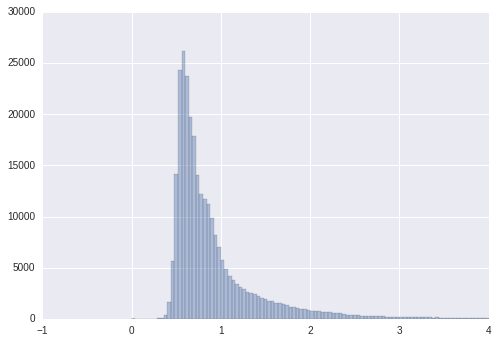

In [77]:
import seaborn as sb
f,a = pl.subplots()
sb.distplot(data,bins=100,hist_kws={"range":(0,4)},ax=a,kde=False)
a.set_xlim(-1,4)


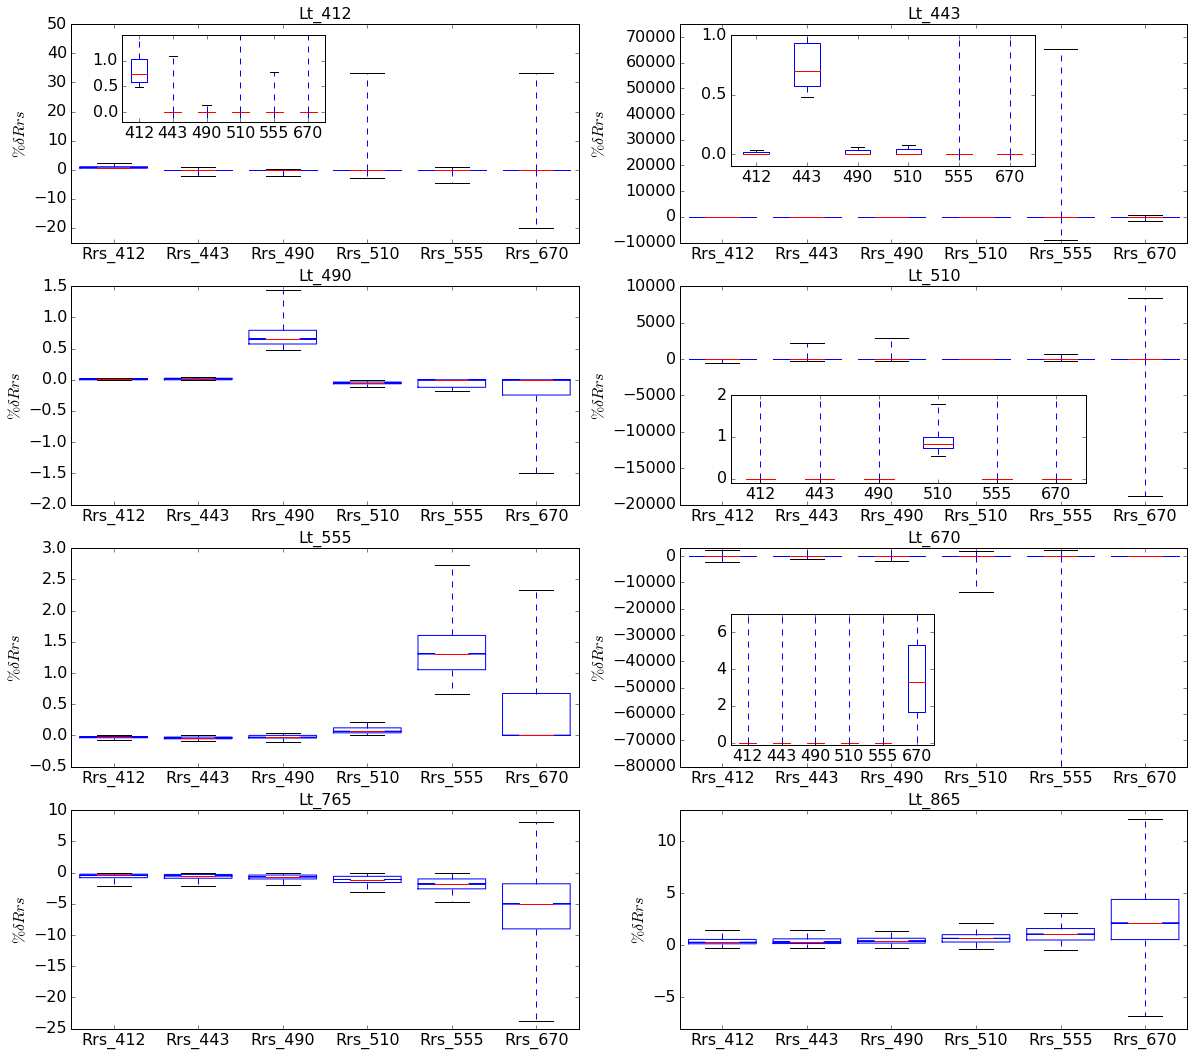

In [26]:
def axis_to_fig(axis):
    fig = axis.figure
    def transform(coord):
        return fig.transFigure.inverted().transform(axis.transAxes.transform(coord))
    return transform

def add_sub_axes(axis,rect):
    fig = axis.figure
    left,bottom,width,height = rect
    trans = axis_to_fig(axis)
    figleft,figbottom = trans((left,bottom))
    figwidth,figheight = trans([width,height]) - trans([0,0])
    return fig.add_axes([figleft,figbottom,figwidth,figheight])

rcParams['xtick.minor.visible']=False
rcParams['xtick.labelsize']=16
rcParams['ytick.labelsize']=16
fig,axs=pl.subplots(nrows=4,ncols=2,figsize=(20,18))
vRngDict={'Lt_412':(-25,50),'Lt_443':(-10000,75000),'Lt_490':(-2,1.5),
         'Lt_510':(-20000,10000),'Lt_555':(-.5,3),'Lt_670':(-80000,3000),
         'Lt_765':(-25,10),'Lt_865':(-8,13)}
# -.2,5
vSubDict={'Lt_412':(-.2,1.5),'Lt_443':(-.1,1),'Lt_490':None,
         'Lt_510':(-.1,2),'Lt_555':None,'Lt_670':(-.1,7),
         'Lt_765':None,'Lt_865':None}
recDict={'Lt_412':[.1,.55,.4,.4],'Lt_443':[.1,.35,.6,.6],'Lt_490':[.1,.05,.7,.4],
         'Lt_510':[.1,.1,.7,.4],'Lt_555':[.1,.35,.5,.6],'Lt_670':[.1,.1,.4,.6],
         'Lt_765':[.1,.05,.4,.6],'Lt_865':[.1,.55,.6,.42]}
yaxTickDict={'Lt_412':[0,0.5,1],'Lt_443':[0,0.5,1],'Lt_510':[0,1,2],'Lt_670':[0,2,4,6]}
for ltky,ax in zip(ltKeys,axs.ravel()):
    data = [wigDictRrs[ltky][rrsky] * 100 for rrsky in rrsKeys]
    ax.boxplot(data,'gD',labels=rrsKeys,widths=0.8,whis=[5,95],showfliers=False)
    ax.set_ylim(vRngDict[ltky])
    ax.set_title(ltky,fontsize=fontSize)
    ax.set_ylabel(r'$ \% \delta Rrs $',fontsize=fontSize)
    if vSubDict[ltky] is not None:
        subaxis = add_sub_axes(ax,recDict[ltky])
        subaxis.boxplot(data,labels=bands[:-2],whis=[5,95],showfliers=False)
        subaxis.set_ylim(vSubDict[ltky])
        subaxis.set_yticks(yaxTickDict[ltky])